# Using merge_ordered()

### Correlation between GDP and S&P500

In [37]:
# Import pandas with alias pd
import pandas as pd
# Import nympy with alias np
import numpy as np
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

In order to get some datasets I needed to export them by convertind the dataframe to a csv and then outputting the contents of the file to the terminal such as the example below.
```Python
# output the contents of the dataframe to CSV wile also removing the index for pushing it to a dataframe.
wards_altered.to_csv("wards_altered.csv", index=False)

# open the file and read the contents of the file to the terminal.
with open("wards_altered.csv", "r") as f:
    print(f.read())
```

### Correlation between GDP and S&P500

In [7]:
# import data
gdp = pd.read_csv("../datasets/WorldBank_GDP.csv")
sp500 = pd.read_csv("../datasets/s&P500.csv")
# get the first few rows of eacg set.
print("gdp")
print(gdp.head())
print("sp500")
print(sp500.head())

gdp
    Country Name Country Code     Indicator Name  Year           GDP
0          China          CHN  GDP (current US$)  2010  6.087160e+12
1        Germany          DEU  GDP (current US$)  2010  3.417090e+12
2          Japan          JPN  GDP (current US$)  2010  5.700100e+12
3  United States          USA  GDP (current US$)  2010  1.499210e+13
4          China          CHN  GDP (current US$)  2011  7.551500e+12
sp500
   Date  Returns
0  2008   -38.49
1  2009    23.45
2  2010    12.78
3  2011     0.00
4  2012    13.41


In [12]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value using fill method.
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='Year', right_on='Date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[["GDP", "Returns"]]

# Print gdp_returns correlation
print (gdp_returns.corr())

              GDP   Returns
GDP      1.000000  0.040669
Returns  0.040669  1.000000


### Phillips curve using merge_ordered()

In [13]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on="date", how="inner")

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot(x="unemployment_rate", y="cpi", kind="scatter")
plt.show()

NameError: name 'inflation' is not defined

### merge_ordered() caution, multiple columns

In [18]:
# Import Data
pop = pd.read_csv("../datasets/WorldBank_POP.csv")
print("pop")
print(pop.head())
print("gdp")
print(gdp.head())

pop
  Country Name Country Code     Indicator Name  Year         Pop
0        Aruba          ABW  Population, total  2010    101669.0
1  Afghanistan          AFG  Population, total  2010  29185507.0
2       Angola          AGO  Population, total  2010  23356246.0
3      Albania          ALB  Population, total  2010   2913021.0
4      Andorra          AND  Population, total  2010     84449.0
gdp
    Country Name Country Code     Indicator Name  Year           GDP
0          China          CHN  GDP (current US$)  2010  6.087160e+12
1        Germany          DEU  GDP (current US$)  2010  3.417090e+12
2          Japan          JPN  GDP (current US$)  2010  5.700100e+12
3  United States          USA  GDP (current US$)  2010  1.499210e+13
4          China          CHN  GDP (current US$)  2011  7.551500e+12


In [21]:
# Merge gdp and pop on country and date with fill
date_ctry = pd.merge_ordered(gdp, pop, on=["Country Code", "Year"], fill_method="ffill")

# Print date_ctry
print(date_ctry)

     Country Name_x Country Code   Indicator Name_x  Year           GDP  \
0               NaN          ABW                NaN  2010           NaN   
1               NaN          ABW                NaN  2011           NaN   
2               NaN          ABW                NaN  2012           NaN   
3               NaN          ABW                NaN  2012           NaN   
4               NaN          ABW                NaN  2013           NaN   
...             ...          ...                ...   ...           ...   
2643  United States          ZWE  GDP (current US$)  2014  2.049410e+13   
2644  United States          ZWE  GDP (current US$)  2015  2.049410e+13   
2645  United States          ZWE  GDP (current US$)  2016  2.049410e+13   
2646  United States          ZWE  GDP (current US$)  2017  2.049410e+13   
2647  United States          ZWE  GDP (current US$)  2018  2.049410e+13   

     Country Name_y   Indicator Name_y         Pop  
0             Aruba  Population, total    1016

# Using merge_asof()

### Using merge_asof() to study stocks

In [38]:
# Import Data
jpm = pd.read_csv("../datasets/jpm.csv")
wells = pd.read_csv("../datasets/wells.csv")
bac = pd.read_csv("../datasets/bac.csv")
# Display head
print("jpm")
print(jpm.head())
print("wells")
print(wells.head())
print("bac")
print(bac.head())

jpm
             date_time    close
0  2017-11-17 15:35:17  98.1200
1  2017-11-17 15:40:04  98.1800
2  2017-11-17 15:45:01  97.7307
3  2017-11-17 15:50:55  97.7400
4  2017-11-17 15:55:00  97.8150
wells
             date_time    close
0  2017-11-17 15:35:08  54.3227
1  2017-11-17 15:40:00  54.3200
2  2017-11-17 15:45:32  54.1900
3  2017-11-17 15:50:07  54.1700
4  2017-11-17 15:55:00  54.1841
bac
             date_time   close
0  2017-11-17 15:35:17  26.552
1  2017-11-17 15:40:06  26.552
2  2017-11-17 15:45:05  26.388
3  2017-11-17 15:50:34  26.378
4  2017-11-17 15:55:06  26.383


In [39]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on="date_time", suffixes=('', '_wells'), direction="nearest")

# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac,on="date_time", suffixes=('_jpm', '_bac'), direction="nearest")

# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=["close_jpm", "close_wells", "close_bac"])
plt.show()

TypeError: No matching signature found

### Using merge_asof() to create dataset

In [ ]:
# Merge gdp and recession on date using merge_asof()
gdp_recession = pd.merge_asof(gdp, recession, on='date')

# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

# Selecting data with .query()

### Explore financials with .query()

In [42]:
social_fin = pd.read_csv("../datasets/social_fin.csv")
print(social_fin.head())

            financial  company  year    value
0       total_revenue  twitter  2019  3459329
1     cost_of_revenue  twitter  2019  1137041
2        gross_profit  twitter  2019  2322288
3  operating_expenses  twitter  2019  1955915
4          net_income  twitter  2019  1465659


In [53]:
social_fin.query("value < 0")

,financial,company,year,value
14,net_income,snap,2019,-1033660
29,net_income,snap,2018,-1255911
34,net_income,twitter,2017,-108063
44,net_income,snap,2017,-3445066
49,net_income,twitter,2016,-456873
57,gross_profit,snap,2016,-47178
59,net_income,snap,2016,-514643


### Subsetting rows with .query()

In [67]:
# Load Data
pop = pd.read_csv("../datasets/pop.csv")
gdp = pd.read_csv("../datasets/gdp.csv")
# print head
print(pop.head())
print(gdp.head())

         date    country       pop  series_code
0  1990-01-01  Australia  17065100  SP.POP.TOTL
1  1991-01-01  Australia  17284000  SP.POP.TOTL
2  1992-01-01  Australia  17495000  SP.POP.TOTL
3  1993-01-01  Australia  17667000  SP.POP.TOTL
4  1990-01-01     Sweden   8558835  SP.POP.TOTL
         date    country          gdp    series_code
0  1990-01-01  Australia  158051.1324  NYGDPMKTPSAKD
1  1990-04-01  Australia  158263.5816  NYGDPMKTPSAKD
2  1990-07-01  Australia  157329.2790  NYGDPMKTPSAKD
3  1990-09-01  Australia  158240.6781  NYGDPMKTPSAKD
4  1991-01-01  Australia  156195.9535  NYGDPMKTPSAKD


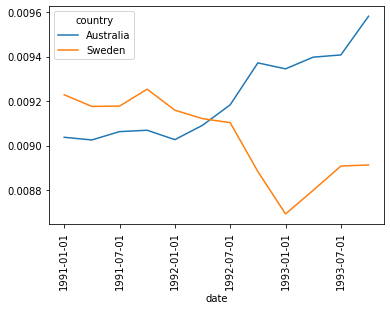

In [68]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country','date'], fill_method='ffill')

# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot data so gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

# Reshaping Data with .melt()

### Select the right .melt() arguments

In [70]:
# load data
inflation = pd.read_csv("../datasets/inflation.csv")
# Display head
print(inflation.head())

  country    indicator  2017  2018  2019
0  Brazil  Inflation %  3.45  3.66  3.73
1  Canada  Inflation %  1.60  2.27  1.95
2  France  Inflation %  1.03  1.85  1.11
3   India  Inflation %  2.49  4.86  7.66


In [72]:
inflation.melt(id_vars=["country", "indicator"], var_name='year', value_name='annual')

,country,indicator,year,annual
0,Brazil,Inflation %,2017,3.45
1,Canada,Inflation %,2017,1.60
2,France,Inflation %,2017,1.03
3,India,Inflation %,2017,2.49
4,Brazil,Inflation %,2018,3.66
5,Canada,Inflation %,2018,2.27
6,France,Inflation %,2018,1.85
7,India,Inflation %,2018,4.86
8,Brazil,Inflation %,2019,3.73
9,Canada,Inflation %,2019,1.95


### Using .melt() to reshape government data

In [74]:
# import data
ur_wide = pd.read_csv("../datasets/ur_wide.csv")
# print head
print(ur_wide.head())

   year  jan  feb  mar  apr  may  jun  jul  aug  sep  oct  nov  dec
0  2010  9.8  9.8  9.9  9.9  9.6  9.4  9.4  9.5  9.5  9.4  9.8  9.3
1  2011  9.1  9.0  9.0  9.1  9.0  9.1  9.0  9.0  9.0  8.8  8.6  8.5
2  2012  8.3  8.3  8.2  8.2  8.2  8.2  8.2  8.1  7.8  7.8  7.7  7.9
3  2013  8.0  7.7  7.5  7.6  7.5  7.5  7.3  7.2  7.2  7.2  6.9  6.7
4  2014  6.6  6.7  6.7  6.2  6.3  6.1  6.2  6.1  5.9  5.7  5.8  5.6


In [1]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=["year"], var_name="month", value_name="unempl_rate")

# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(fur_tall['month'] + '-' + ur_tall['year'])

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values("date", ascending=True)

# Plot the unempl_rate by date
ur_sorted.plot(x="date" , y="unempl_rate")
plt.show()

NameError: name 'ur_wide' is not defined